In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import random 

In [2]:
# INPUT: set path for data placement 
os.chdir(r'C:\Users\mshafin\Desktop\xavient_churn_project')
#os.chdir(r'C:\Users\mohammad shafin\Desktop\xavient_churn_project')

os.getcwd()
random.seed(42)

In [3]:
# INPUT: data loaded to a pandas dataframe
df = pd.read_csv('telecom_churn_training.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
customerID          5634 non-null object
gender              5634 non-null object
SeniorCitizen       5634 non-null int64
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null int64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null object
OnlineBackup        5634 non-null object
DeviceProtection    5634 non-null object
TechSupport         5634 non-null object
StreamingTV         5634 non-null object
StreamingMovies     5634 non-null object
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5626 non-null float64
Churn               5634 non-null object
dtypes: float64(2), int64(2), ob

In [5]:
# count number of missing values in each column
# sum True's
print("Columnwise missing value count")
df.isnull().sum()

Columnwise missing value count


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [6]:
# INPUT: set customer identification code and target variable
customer_identity_code = 'customerID'
target_code = 'Churn'

In [7]:
# set index for customer identification code
df = df.set_index(customer_identity_code)

In [8]:
# identify target variable
df['target'] = df[target_code]

In [9]:
# set target labels from input
label_target1 = 'Yes'
label_target0 = 'No'

In [10]:
# function to recode target levels
def dependent_col(row):
    if row['target'] == label_target1:
        val = 1  # input
    elif row['target'] == label_target0:
        val = 0  # imput
    else:
        val = 2
    return val

In [11]:
df['target'] = df.apply(dependent_col, axis=1)
print(df.loc[:,['target','Churn']].sample(5)) #check changes in target recoding

            target Churn
customerID              
3859-CVCET       1   Yes
5562-YJQGT       0    No
0604-THJFP       0    No
3566-HJGPK       0    No
0620-DLSLK       0    No


In [12]:
# Keep rows when target variable is finite
start = df.shape[1]
df = df[np.isfinite(df['target'])]
finish = df.shape[1]
print("The number of row/rows dropped because of missing target variable is " + str(start-finish))

The number of row/rows dropped because of missing target variable is 0


In [13]:
# droping initial target
df = df.drop(['Churn'],axis=1)

In [14]:
df.target.value_counts()

0    4139
1    1495
Name: target, dtype: int64

In [15]:
# populate with columns, which needs to be considered 'object' type
object_columns = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                  'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'Contract','PaperlessBilling','PaymentMethod'] 

In [16]:
for column in object_columns:
    df[column] = df[column].astype('object')

In [17]:
print("Value count of each level for datatype 'object'")
feature_names = list(df[object_columns])

#for column in feature_names:
#    if df[column].dtypes == "object":
#        print (column)
#        print (df[column].value_counts(dropna=False))

Value count of each level for datatype 'object'


In [18]:
# object variables converted to categories for cat.codes
object_columns = df.select_dtypes(['object']).columns

In [19]:
print("The count of columns were successfully imputed with missing value indicator 'UKNOWN'")
for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].fillna("UKNOWN").astype('object')
#print(df[object_columns].info())        

The count of columns were successfully imputed with missing value indicator 'UKNOWN'


In [20]:
for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].astype('category')

In [21]:
#df[object_columns].info()

In [22]:
df[object_columns] = df[object_columns].apply(lambda x: x.cat.codes)

In [23]:
#for column in object_columns:
#    print (column)
#    print(df[column].value_counts())

In [24]:
import pandas as pd
import scipy.stats as scs


def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)[1]

In [25]:
#print(chi_square_of_df_cols(df, 'DeviceProtection', 'target'))

In [26]:
#object_columns_final = []
#for column in object_columns:
#    print(column)
#    print(chi_square_of_df_cols(df, column, 'target'))
#    if chi_square_of_df_cols(df, column, 'target') <= 0.05:
#        object_columns_final.append(column)
#print(object_columns_final)

In [27]:
object_columns_final = []
chi_square_pvalue_final = []
for column in object_columns:
    chisquare_pvalue = round(chi_square_of_df_cols(df, column, 'target').astype('float64'),3)
    #if chi_square_of_df_cols(df, column, 'target') <= 0.05:
    object_columns_final.append(column)
    chi_square_pvalue_final.append(chisquare_pvalue)


In [28]:
df_catname = pd.DataFrame({'feature_name':object_columns_final})
df_pvalue = pd.DataFrame({'p-value':chi_square_pvalue_final})
#p-value_df = pd.concat([df_catname,df_pvalue])
frames = [df_catname,df_pvalue]
pd.concat(frames,axis=1)

,feature_name,p-value
0,gender,0.467
1,SeniorCitizen,0.000
2,Partner,0.000
3,Dependents,0.000
4,PhoneService,0.524
5,MultipleLines,0.005
6,InternetService,0.000
7,OnlineSecurity,0.000
8,OnlineBackup,0.000
9,DeviceProtection,0.000


In [29]:
object_columns_final = []

for column in object_columns:
    chisquare_pvalue = round(chi_square_of_df_cols(df, column, 'target').astype('float64'),3)
    if chi_square_of_df_cols(df, column, 'target') <= 0.05:
        object_columns_final.append(column)
print("Categorical variables selected for modeling post chi-square test")
print(object_columns_final)

Categorical variables selected for modeling post chi-square test
['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [30]:
# missing value treatments
# impute missing numeric columns with mean
numeric_columns_mean = ['MonthlyCharges','tenure','TotalCharges'] # populate with numeric columns
# impute missing numeric columns with zero
numeric_columns_zero = [] # populate with numeric columns
scale_columns = numeric_columns_mean + numeric_columns_zero
 

In [31]:
# for mean imputation
for column in numeric_columns_mean:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(df[column].mean())
# for 0 imputation
for column in numeric_columns_zero:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(0)

In [32]:
from sklearn.preprocessing import scale
for column in scale_columns:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = scale(df[column].astype('float64'))

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#df.columns
target_column = ['target']
all_columns = scale_columns + object_columns_final + target_column
print(all_columns)
df = df[all_columns]
df.shape

['MonthlyCharges', 'tenure', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'target']


(5634, 18)

In [35]:
from sklearn.model_selection import train_test_split
training_features, test_features,\
training_target, test_target, = train_test_split(df.drop(['target'], axis=1).values, df['target'].values, test_size = .1, random_state=12)
training_features.shape,training_target.shape

((5070, 17), (5070,))

In [36]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

X_train, X_val, y_train, y_val \
= train_test_split(training_features, training_target, test_size = .1, random_state=12)
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

D:\Users\mshafin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
#df1 = df.drop(['target'],axis=1).copy()

In [38]:
#df1 = df.copy()
#df1.shape
#print("Features selected for modeling")
#print(df1.columns)

In [39]:
#X = df1.values
#y = df[['target']].values
#X.shape,y.shape

In [40]:
#feature_selected = X.shape[1]
#feature_selected = 15 #manual input
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.feature_selection import RFE
#no_features = feature_selected # Input
#model = RandomForestRegressor()
#rfe = RFE(model, no_features)
#fit = rfe.fit(X, y)


In [41]:
#print("Num Features: " + str(fit.n_features_))
#print("Selected Features: " + str(fit.support_))
#print("Feature Ranking: " + str(fit.ranking_))

In [42]:
#df1.columns[fit.support_]

In [43]:
#X = df[df1.columns[fit.support_]].values
#y = df['target'].values
#array1 = 
#X = array1.values
#y = y.values
#X.shape,y.shape

In [44]:


#X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=21,test_size=0.3)
#X_train.shape,X_test.shape,y_train.shape,y_test.shape

('GBM', 0.8359961588957491, 0.07366568879840242)
('RF', 0.8432796199701936, 0.04873137778022214)
('DT', 0.780171297281953, 0.06176370793930213)
('ADA', 0.8161965084096231, 0.06792007507345413)


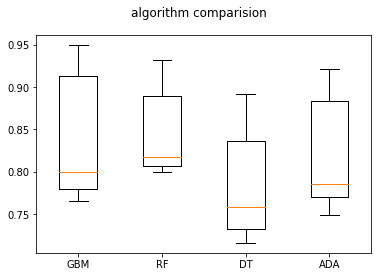

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import model_selection
import matplotlib.pyplot as plt

# generate list of models  
models = []
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('ADA', AdaBoostClassifier()))


# check model performance
results = []
names = []
seed = 7
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print (msg)

# compare algorithms
fig = plt.figure()
fig.suptitle("algorithm comparision")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    report = classification_report(y_test, y_pred)
    print("accuracy :" +str(accuracy))
    print("recall :" +str(recall))
    print(" tn, fp, fn, tp :" )
    print(tn, fp, fn, tp)
    print("matrix :")
    print(matrix)
    print("report :")
    print(report)
    return accuracy

In [47]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier

In [48]:
from pprint import pprint
GBM = GradientBoostingClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Number of iterations needed
n_estimators = [int(x) for x in np.linspace(200, 2000, num = 10)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
max_features = ['sqrt','auto','log2','None','1','0.1']
loss = ['deviance', 'exponential']
max_depth = [4, 6, 8]
criterion = ['friedman_mse']
min_samples_split = [2, 5, 10]
min_samples_leaf = [20,50,100,150]
random_state = [21]
# Create the random grid
random_grid_gbm = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss':loss,
               'max_depth': max_depth,
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}
pprint(random_grid_gbm)

{'criterion': ['friedman_mse'],
 'learning_rate': [0.1, 0.05, 0.02, 0.01],
 'loss': ['deviance', 'exponential'],
 'max_depth': [4, 6, 8],
 'min_samples_leaf': [20, 50, 100, 150],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'random_state': [21]}


In [49]:
GBM = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
gbm_random = RandomizedSearchCV(estimator = GBM, param_distributions = random_grid_gbm, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [50]:
# Fit the random search model
gbm_random.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   34.7s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'loss': ['deviance', 'exponential'], 'max_depth': [4, 6, 8], 'criterion': ['friedman_mse'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [20, 50, 100, 150], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
     

In [51]:
gbm_best_accuracy = evaluate(gbm_random,test_features,test_target)

accuracy :0.7836879432624113
recall :0.6709677419354839
 tn, fp, fn, tp :
338 71 51 104
matrix :
[[338  71]
 [ 51 104]]
report :
             precision    recall  f1-score   support

          0       0.87      0.83      0.85       409
          1       0.59      0.67      0.63       155

avg / total       0.79      0.78      0.79       564



[10 12 13  9  7  8 11  6  5  3 15  4 16 14  1  2  0]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


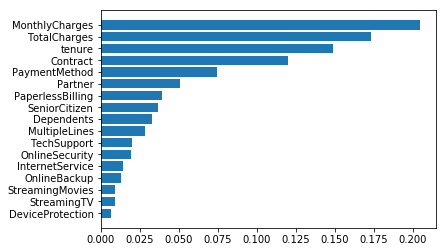

['MonthlyCharges' 'tenure' 'TotalCharges' 'SeniorCitizen' 'Partner'
 'Dependents' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod']
[0.20419786 0.14885033 0.17303997 0.036494   0.0506218  0.03284767
 0.02824833 0.01431563 0.01943003 0.01320397 0.00681609 0.01994252
 0.00894592 0.00939528 0.12001977 0.03937384 0.07425697]


In [52]:
feature_names=df.drop(['target'],axis=1).columns
feature_importance = gbm_random.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
print(pos)
print(type(np.array(feature_names)))
print(type(feature_importance))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()
print((np.array(feature_names)))
print(feature_importance)

In [53]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [54]:
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [55]:
rf_best_accuracy = evaluate(rf_random,test_features,test_target)

accuracy :0.7872340425531915
recall :0.6387096774193548
 tn, fp, fn, tp :
345 64 56 99
matrix :
[[345  64]
 [ 56  99]]
report :
             precision    recall  f1-score   support

          0       0.86      0.84      0.85       409
          1       0.61      0.64      0.62       155

avg / total       0.79      0.79      0.79       564



[12 13 10  6  3  5  9  4  7  8 15 11 16  2  0  1 14]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


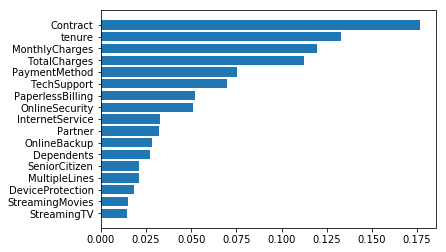

['MonthlyCharges' 'tenure' 'TotalCharges' 'SeniorCitizen' 'Partner'
 'Dependents' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod']
[0.11958255 0.13297599 0.11229696 0.02122448 0.03248511 0.02733022
 0.02116715 0.0325865  0.05086644 0.02810507 0.01861406 0.06958943
 0.01442906 0.01486707 0.17635332 0.05237634 0.07515026]


In [56]:
feature_names=df.drop(['target'],axis=1).columns
feature_importance = rf_random.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
print(pos)
print(type(np.array(feature_names)))
print(type(feature_importance))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()
print((np.array(feature_names)))
print(feature_importance)

In [57]:
from pprint import pprint
ADA = AdaBoostClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Number of iterations needed
n_estimators = [int(x) for x in np.linspace(200, 2000, num = 10)]
learning_rate = [0.1, 0.05, 0.02, 0.01]
algorithm  = ['SAMME', 'SAMME.R']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_state = [21]

# Create the random grid
random_grid_ada = {'n_estimators': n_estimators,
                   'learning_rate': learning_rate,
                   'algorithm':algorithm,
 #                 'max_depth': max_depth,
 #                 'min_samples_leaf': min_samples_leaf,
                   'random_state': random_state}
pprint(random_grid_ada)

{'algorithm': ['SAMME', 'SAMME.R'],
 'learning_rate': [0.1, 0.05, 0.02, 0.01],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'random_state': [21]}


In [58]:
# First create the base model to tune
ada = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = random_grid_ada, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ada_random.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   35.4s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [59]:
ada_best_accuracy = evaluate(ada_random,test_features,test_target)

accuracy :0.7358156028368794
recall :0.8129032258064516
 tn, fp, fn, tp :
289 120 29 126
matrix :
[[289 120]
 [ 29 126]]
report :
             precision    recall  f1-score   support

          0       0.91      0.71      0.80       409
          1       0.51      0.81      0.63       155

avg / total       0.80      0.74      0.75       564



[ 2 10  7 12 13  9  6  8 11  3  5 15  4 16  0  1 14]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


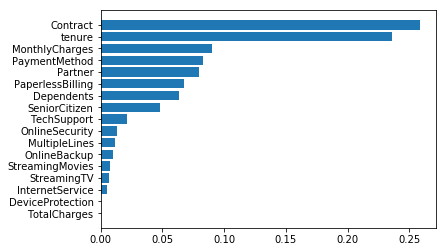

['MonthlyCharges' 'tenure' 'TotalCharges' 'SeniorCitizen' 'Partner'
 'Dependents' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod']
[0.08987395 0.23602114 0.         0.04796111 0.07954607 0.06312861
 0.01185393 0.00469922 0.01337821 0.00983636 0.         0.02106725
 0.00634177 0.00762164 0.25815265 0.06777639 0.08274169]


In [60]:
feature_names=df.drop(['target'],axis=1).columns
feature_importance = ada_random.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
print(pos)
print(type(np.array(feature_names)))
print(type(feature_importance))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
feature_names[sorted_idx]
plt.show()
print((np.array(feature_names)))
print(feature_importance)

In [61]:
# import pickle
import pickle
# save GBM model to disk
filename1 = 'finalized_gbm_smote.sav'
pickle.dump(gbm_random, open(filename1, 'wb'))

# save RF model to disk
filename2 = 'finalized_rf_smote.sav'
pickle.dump(rf_random, open(filename2, 'wb'))

# save Adaboost model to disk
filename3 = 'finalized_ada_smote.sav'
pickle.dump(ada_random, open(filename3, 'wb'))

In [62]:
# First create the base model to tune
GBM = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
gbm_random_un = RandomizedSearchCV(estimator = GBM, param_distributions = random_grid_gbm, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_random_un.fit(training_features, training_target)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   25.1s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'loss': ['deviance', 'exponential'], 'max_depth': [4, 6, 8], 'criterion': ['friedman_mse'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [20, 50, 100, 150], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
     

In [63]:
gbm_best_accuracy = evaluate(gbm_random_un,test_features,test_target)

accuracy :0.7925531914893617
recall :0.5419354838709678
 tn, fp, fn, tp :
363 46 71 84
matrix :
[[363  46]
 [ 71  84]]
report :
             precision    recall  f1-score   support

          0       0.84      0.89      0.86       409
          1       0.65      0.54      0.59       155

avg / total       0.78      0.79      0.79       564



In [64]:
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random_un = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_un.fit(training_features, training_target)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   46.8s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [65]:
rf_best_accuracy = evaluate(rf_random_un,test_features,test_target)

accuracy :0.7890070921985816
recall :0.5483870967741935
 tn, fp, fn, tp :
360 49 70 85
matrix :
[[360  49]
 [ 70  85]]
report :
             precision    recall  f1-score   support

          0       0.84      0.88      0.86       409
          1       0.63      0.55      0.59       155

avg / total       0.78      0.79      0.78       564



In [66]:
# First create the base model to tune
ada = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
ada_random_un = RandomizedSearchCV(estimator = ada, param_distributions = random_grid_ada, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ada_random_un.fit(training_features, training_target)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   26.8s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [21]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [67]:
ada_best_accuracy = evaluate(ada_random_un,test_features,test_target)

accuracy :0.7836879432624113
recall :0.4967741935483871
 tn, fp, fn, tp :
365 44 78 77
matrix :
[[365  44]
 [ 78  77]]
report :
             precision    recall  f1-score   support

          0       0.82      0.89      0.86       409
          1       0.64      0.50      0.56       155

avg / total       0.77      0.78      0.77       564



In [68]:
# save GBM model to disk
filename4 = 'finalized_gbm_un.sav'
pickle.dump(gbm_random_un, open(filename4, 'wb'))

# save RF model to disk
filename5 = 'finalized_rf_un.sav'
pickle.dump(rf_random_un, open(filename5, 'wb'))

# save Adaboost model to disk
filename6 = 'finalized_ada_un.sav'
pickle.dump(ada_random_un, open(filename6, 'wb'))

In [69]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
input_dimenation = X.shape[1]

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = input_dimenation, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
seed=7
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=100, verbose=1)
# Fit the model
model.fit(X_train, y_train)